# Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

# Background

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri.

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut. Selain itu, mereka juga telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: [Jaya Jaya Maju](https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee).



# Persiapan

Menyiapkan library yang dibutuhkan

In [ ]:
from dotenv import load_dotenv
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sqlalchemy import create_engine
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
load_dotenv()
warnings.filterwarnings('ignore')

# Data Understanding

Menyiapkan data yang akan digunakan


## Penjelasan Dataset

Data ini berisi detail demografis, metrik terkait pekerjaan, dan tanda apakah karyawan mengalami attrition atau tidak.

- EmployeeId - Pengenal Karyawan
- Attrition - Apakah karyawan mengalami attrition? (0=tidak, 1=ya)
- Age - Usia karyawan
- BusinessTravel - Komitmen perjalanan dinas untuk pekerjaan
- DailyRate - Gaji harian
- Department - Departemen karyawan
- DistanceFromHome - Jarak dari rumah ke tempat kerja (dalam km)
- Education - 1-Di bawah perguruan tinggi, 2-Perguruan tinggi, 3-Sarjana, 4-Magister, 5-Doktor
- EducationField - Bidang pendidikan
- EnvironmentSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- Gender - Jenis kelamin karyawan
- HourlyRate - Gaji per jam
- JobInvolvement - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- JobLevel - Tingkat pekerjaan (1 sampai 5)
- JobRole - Peran pekerjaan
- JobSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- MaritalStatus - Status pernikahan
- MonthlyIncome - Gaji bulanan
- MonthlyRate - Tarif bulanan
- NumCompaniesWorked - Jumlah perusahaan tempat bekerja sebelumnya
- Over18 - Apakah berusia di atas 18 tahun?
- OverTime - Lembur?
- PercentSalaryHike - Persentase kenaikan gaji tahun lalu
- PerformanceRating - 1-Rendah, 2-Baik, 3-Luar Biasa, 4-Sangat Luar Biasa
- RelationshipSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- StandardHours - Jam kerja standar
- StockOptionLevel - Tingkat opsi saham
- TotalWorkingYears - Total tahun pengalaman kerja
- TrainingTimesLastYear - Jumlah pelatihan yang diikuti tahun lalu
- WorkLifeBalance - 1-Rendah, 2-Baik, 3-Luar Biasa, 4-Sangat Luar Biasa
- YearsAtCompany - Lama bekerja di perusahaan
- YearsInCurrentRole - Lama menjabat di peran saat ini
- YearsSinceLastPromotion - Lama waktu sejak promosi terakhir
- YearsWithCurrManager - Lama bekerja dengan manajer saat ini


## Membaca Dataset

In [ ]:
data = pd.read_csv("database/employee_data.csv")
data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Mengirim Dataset ke Database Supabase

In [ ]:
URL = os.getenv("DB_URI")

engine = create_engine(URL)
data.to_sql('hr', engine)

## Melihat Informasi Umum Dataset


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Statistik Deskriptif


In [ ]:
data.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Melihat Jumlah Nilai Kosong


In [ ]:
data.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


## Analisis Fitur Kategorikal

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Analisis Fitur Kategorikal:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {data[col].unique()}")
    print(f"Value Counts:\n{data[col].value_counts()}")

Analisis Fitur Kategorikal:

Column: BusinessTravel
Unique Values: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Value Counts:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Column: Department
Unique Values: ['Human Resources' 'Research & Development' 'Sales']
Value Counts:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Column: EducationField
Unique Values: ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
Value Counts:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Column: Gender
Unique Values: ['Male' 'Female']
Value Counts:
Gender
Male      882
Female    588
Name: count, dtype: int64

Column: JobRole
Unique Values: ['Human Resources' 'Healthcare Represent

Dari hasil Analisis Fitur Kategorikal di atas, didapatkan bahwa berikut adalah beberapa fitur yang hanya memiliki 1 value:
- Over18

## Distribusi Data Attrition


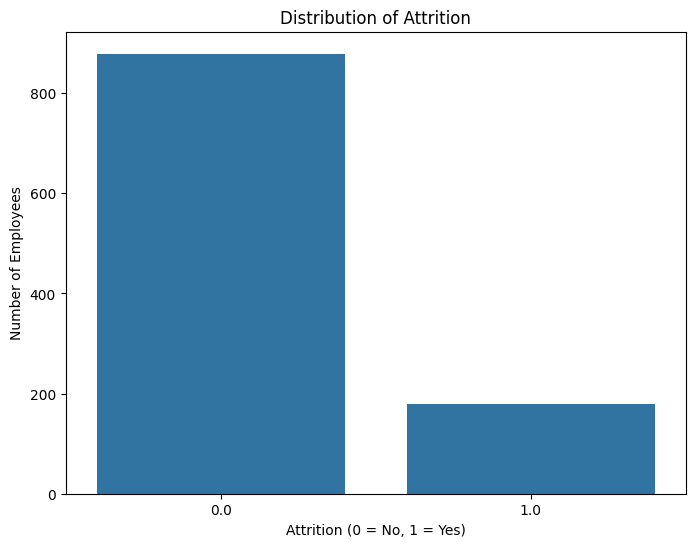

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.show()

## Korelasi Antar Fitur Numerik


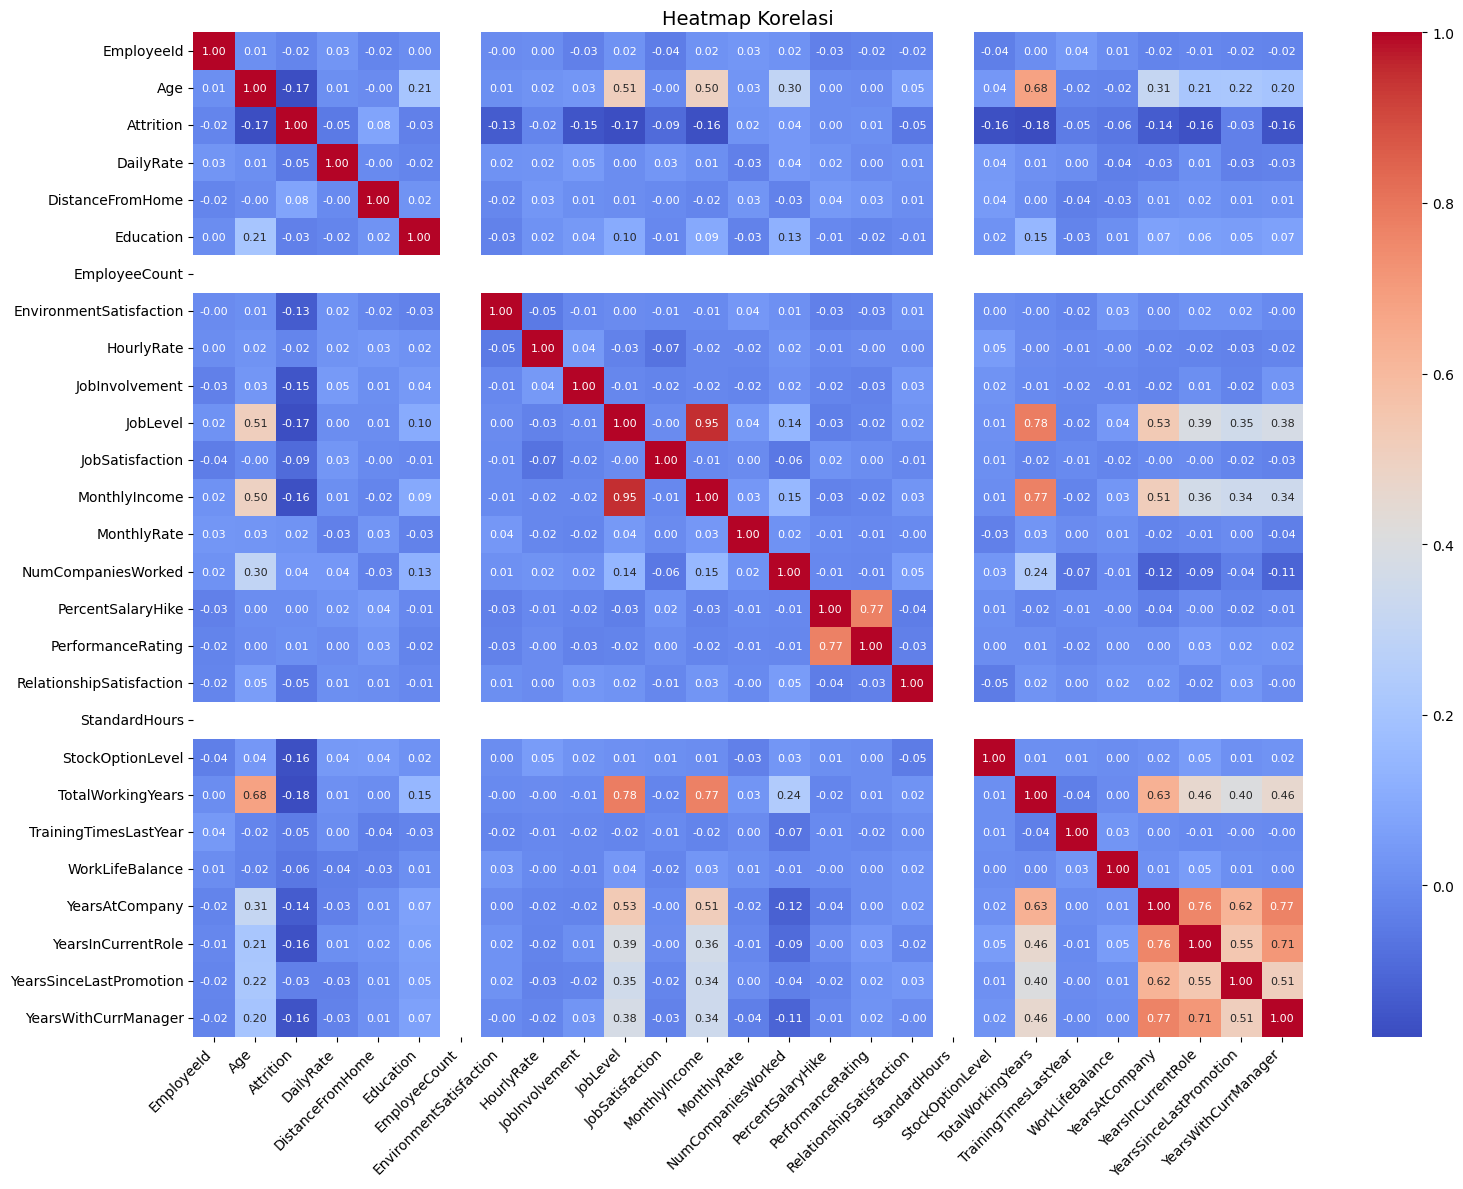

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 8}
)
plt.title('Heatmap Korelasi', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Dari visualisasi diatas didapatkan beberapa fitur yang memiliki korelasi yang rendah terhadap fitur `Attrition` seperti:
- StandardHours
- EmployeeCount
- EmployeeId
- DailyRate
- DistanceFromHome
- Education
- HourlyRate
- JobSatisfaction
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- TrainingTimesLastYear
- WorkLifeBalance
- YearsSinceLastPromotion

In [ ]:
# Hitung correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Dapatkan korelasi semua fitur terhadap 'Attrition'
attrition_correlation = correlation_matrix['Attrition']

# Menetapkan batas untuk korelasi rendah
threshold = 0.1

# Menemukan fitur dengan korelasi rendah terhadap 'Attrition'
low_correlation_features = attrition_correlation[abs(attrition_correlation) < threshold]

print("Fitur dengan korelasi rendah terhadap 'Attrition':")
low_correlation_features

Fitur dengan korelasi rendah terhadap 'Attrition':


,Attrition
EmployeeId,-0.017912
DailyRate,-0.051992
DistanceFromHome,0.078074
Education,-0.032631
HourlyRate,-0.017524
JobSatisfaction,-0.091751
MonthlyRate,0.023299
NumCompaniesWorked,0.037429
PercentSalaryHike,0.004907
PerformanceRating,0.007755


# Data Preparation / Preprocessing

## Menyalin Dataset


In [ ]:
processed_data = data.copy()

## Menghapus Kolom yang Tidak Relevan


In [ ]:
processed_data.drop('StandardHours', axis=1, inplace=True)
processed_data.drop('EmployeeCount', axis=1, inplace=True)
processed_data.drop('EmployeeId', axis=1, inplace=True)
processed_data.drop('DailyRate', axis=1, inplace=True)
processed_data.drop('DistanceFromHome', axis=1, inplace=True)
processed_data.drop('Education', axis=1, inplace=True)
processed_data.drop('HourlyRate', axis=1, inplace=True)
processed_data.drop('JobSatisfaction', axis=1, inplace=True)
processed_data.drop('MonthlyRate', axis=1, inplace=True)
processed_data.drop('NumCompaniesWorked', axis=1, inplace=True)
processed_data.drop('Over18', axis=1, inplace=True)
processed_data.drop('PercentSalaryHike', axis=1, inplace=True)
processed_data.drop('PerformanceRating', axis=1, inplace=True)
processed_data.drop('RelationshipSatisfaction', axis=1, inplace=True)
processed_data.drop('TrainingTimesLastYear', axis=1, inplace=True)
processed_data.drop('WorkLifeBalance', axis=1, inplace=True)
processed_data.drop('YearsSinceLastPromotion', axis=1, inplace=True)

## Menghapus Data yang Hilang

In [ ]:
processed_data.dropna(inplace=True)

## Encoding Data Kategorikal


In [ ]:
for col in processed_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])

## Memisahkan Fitur dan Target


In [ ]:
X = processed_data.drop('Attrition', axis=1)
y = processed_data['Attrition']

## Scaling Fitur Numerik


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train: 740
Jumlah data test: 318


## Resampling

In [ ]:
# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling pada data training
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print(f"Jumlah data train setelah oversampling: {X_train_resampled.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train setelah oversampling: 1230
Jumlah data test: 318


# Modeling

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Simpan model menggunakan joblib

In [ ]:
joblib.dump(model, 'model/attrition_model.joblib')

['attrition_model.joblib']

In [ ]:
joblib.dump(data, 'model/data.joblib')
joblib.dump(X, 'model/X.joblib')

['X.joblib']

# Evaluation

In [ ]:
y_pred = model.predict(X_test)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       264
         1.0       0.61      0.31      0.41        54

    accuracy                           0.85       318
   macro avg       0.74      0.64      0.66       318
weighted avg       0.83      0.85      0.83       318



# Visualization

## Confusion Matrix

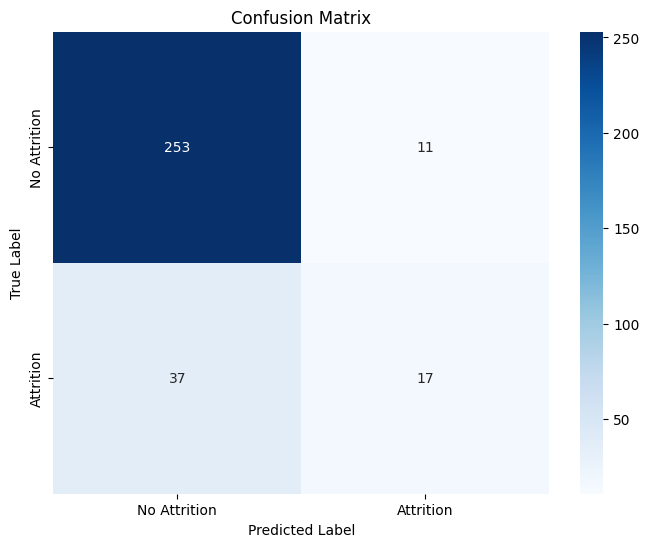

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Visualisasi Fitur Paling Berpengaruh


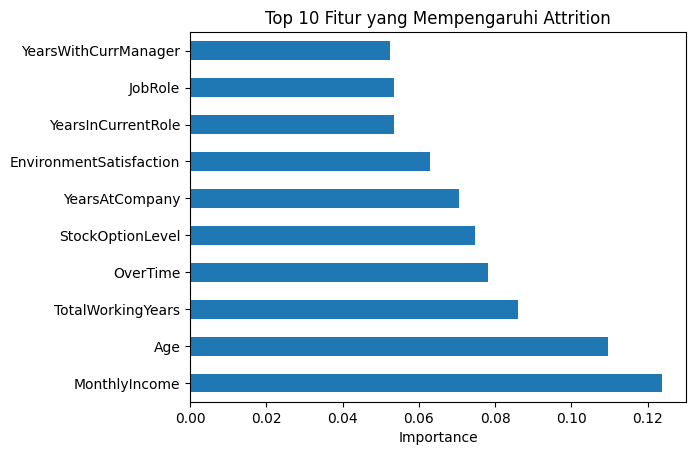

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Fitur yang Mempengaruhi Attrition')
plt.xlabel('Importance')
plt.show()

# Conclusion

Berdasarkan hasil analisis dan visualisasi, ditemukan bahwa beberapa faktor utama yang berkontribusi terhadap tingginya angka attrition adalah:
- Karyawan dengan jam lembur tinggi
- Kepuasan lingkungan kerja yang rendah
- Jarak rumah ke kantor yang jauh
- Masa kerja di bawah 5 tahun
- Umur di bawah 35 tahun

Model prediksi attrition juga berhasil dibangun dengan akurasi yang cukup baik, memberikan gambaran siapa saja yang berpotensi keluar dari perusahaan.


# Rekomendasi Action Items

- Perusahaan perlu mempertimbangkan kenaikan gaji berdasarkan faktor-faktor yang berkontribusi terhadap tingginya angka attrition.
- Meningkatkan kepuasan lingkungan kerja melalui program pengembangan karier, pelatihan, atau sistem reward untuk menekan angka attrition.
- Menerapkan kebijakan kerja fleksibel atau opsi kerja hybrid untuk mengurangi beban karyawan yang tinggal jauh dari kantor.
